### Student Information
Name:陳文斌

Student ID:114062572

GitHub ID:rampageben

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [ ]:
### Begin Assignment Here
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np


## 2. Data Preparation

In [2]:
# read data
df = pd.read_csv("newdataset\Reddit-stock-sentiment.csv")

# categories
categories = ["text", "label"]
df = df[categories]

### **>>> Exercise 1 **

In [3]:
#print 3 examples
for i in range(3):
    print(f"Example {i+1}")
    print("Text:")
    print(df.iloc[i]["text"])       
    print("Label:", df.iloc[i]["label"])  
    print() 

Example 1
Text:
Calls on retards
Label: -1.0

Example 2
Text:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Label: 0.0

Example 3
Text:
Seeing lots of red in the ticker.
Label: 0.0



## 3. Data Transformation

In [4]:
len(df)

847

In [5]:
df[0:2]

,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0


### Adding Columns

In [6]:
# Mapping of numerical labels to text labels
label_map = {
    1.0: "Positive",
    0.0: "Neutral",
   -1.0: "Negative"
}

# add category to the dataframe
df["label_name"] = df["label"].apply(lambda x: label_map.get(x, "Unknown"))


In [7]:
df[0:10]

,text,label,label_name
0,Calls on retards,-1.0,Negative
1,Stunt as in like why did they even make a big ...,0.0,Neutral
2,Seeing lots of red in the ticker.,0.0,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,Positive
4,He didn’t say thank you.,-1.0,Negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,Neutral
6,Trump will respond to china increasing their t...,-1.0,Negative
7,Confirmed not a trap. Its been like this for p...,0.0,Neutral
8,Am I the only one seeing the cup & handle brea...,1.0,Positive
9,HLGN is $10. Hurry and catch it now before it ...,1.0,Positive


### 3.2 Familiarizing yourself with the Data

In [8]:
# a simple query
df[:10][["text","label_name"]]

,text,label_name
0,Calls on retards,Negative
1,Stunt as in like why did they even make a big ...,Neutral
2,Seeing lots of red in the ticker.,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,Positive
4,He didn’t say thank you.,Negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",Neutral
6,Trump will respond to china increasing their t...,Negative
7,Confirmed not a trap. Its been like this for p...,Neutral
8,Am I the only one seeing the cup & handle brea...,Positive
9,HLGN is $10. Hurry and catch it now before it ...,Positive


In [9]:
# using loc (by label)
df.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [10]:
# using iloc (by position)
df.iloc[:10, 0]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

### **>>> Exercise 2 :** 

In [11]:
df[df['label'] == -1][0:3] # find the first 3 documents in category 1

,text,label,label_name
0,Calls on retards,-1.0,Negative
4,He didn’t say thank you.,-1.0,Negative
6,Trump will respond to china increasing their t...,-1.0,Negative


### **>>> Exercise 3 :**  


In [12]:
df[df["label_name"] == "Neutral"][::10][0:5]

,text,label,label_name
1,Stunt as in like why did they even make a big ...,0.0,Neutral
22,"Google ""target dei"".\r\n\r\nI did it for you.\...",0.0,Neutral
40,These China AI factory memes are pretty good. ...,0.0,Neutral
55,The steal,0.0,Neutral
72,"A lot of stocks are down right now, and I'm th...",0.0,Neutral


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [13]:
# check missing values
df.isnull()

,text,label,label_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [14]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 4 :** 

In [15]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [16]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "label"])

In [17]:
dummy_series

text     dummy_record
label               1
dtype: object

In [18]:
dummy_series.to_frame().T

,text,label
0,dummy_record,1


In [19]:
df = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)

In [20]:
len(df)

848

In [21]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [22]:
df.dropna(inplace=True)

In [23]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [24]:
len(df)

847

### >>> **Exercise 5** 

In [25]:
#extra examples of missing values
NA_dict2 = [
    {"id": "G", "missing_example": pd.NA},           
    {"id": "H", "missing_example": "NULL"},          
    {"id": "I", "missing_example": " "},             
    {"id": "J", "missing_example": np.inf},          
    {"id": "K", "missing_example": -np.inf},         
]
NA_df2 = pd.DataFrame(NA_dict2, columns = ['id','missing_example'])
NA_df2

,id,missing_example
0,G,<NA>
1,H,NULL
2,I,
3,J,inf
4,K,-inf


In [26]:
NA_df2['missing_example'].isnull()

0     True
1    False
2    False
3    False
4    False
Name: missing_example, dtype: bool

In [27]:
# Answer here
# G is null because it is null in pandas
# H is not null because it is a string "NULL"
# I is not null because it is a string with a space
# J is not null because it is infinity
# K is not null because it is negative infinity

### 4.2 Dealing with Duplicate Data

In [28]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [29]:
sum(df.duplicated())

23

In [30]:
df.drop_duplicates(keep=False, inplace=True)

In [31]:
len(df)

813

## 5.  Data Preprocessing

### 5.1 Sampling

In [32]:
df_sample = df.sample(n=100) #random state

In [33]:
len(df_sample)

100

In [34]:
df_sample[0:5]

,text,label,label_name
33,Pls respond,0.0,Neutral
529,AERC super low float could rip any day now,0.0,Neutral
599,"Yes, Trump and everyone who voted for him are ...",0.0,Neutral
635,"To be fair - Jerome Powell ""inflation is tran...",0.0,Neutral
7,Confirmed not a trap. Its been like this for p...,0.0,Neutral


### >>> Exercise 6:

In [35]:
# size is changing because of the random sampling
print(len(df))
print(len(df_sample))
# sample index is not continuous because of random sampling
print(df_sample.index[0:10])
# sample order is not the same as original dataframe because of random sampling
print(df_sample.iloc[0:10, 0])
print(df.iloc[0:10, 0])

813
100
Index([33, 529, 599, 635, 7, 198, 624, 798, 94, 797], dtype='int64')
33                                           Pls respond
529           AERC super low float could rip any day now
599    Yes, Trump and everyone who voted for him are ...
635    To be fair  - Jerome Powell "inflation is tran...
7      Confirmed not a trap. Its been like this for p...
198                 Criminals belong in jail, or better.
624    But have you also seen the one that made milli...
798                                                    /
94               I can’t take four years of lying. Help!
797    I currently own \r\n\r\n* TSLA\r\n* FB\r\n* BA...
Name: text, dtype: object
0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, .

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
categories

['text', 'label']

label_name
Neutral     391
Negative    315
Positive    107
Name: count, dtype: int64


<Axes: title={'center': 'label distribution'}, xlabel='label_name'>

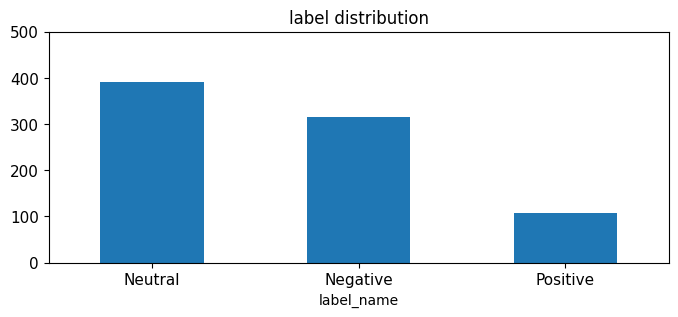

In [38]:
print(df.label_name.value_counts())

# plot barchart for X
df.label_name.value_counts().plot(kind = 'bar',
                                    title = 'label distribution',
                                    ylim = [0, 500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

label_name
Neutral     47
Negative    39
Positive    14
Name: count, dtype: int64


<Axes: title={'center': 'label distribution'}, xlabel='label_name'>

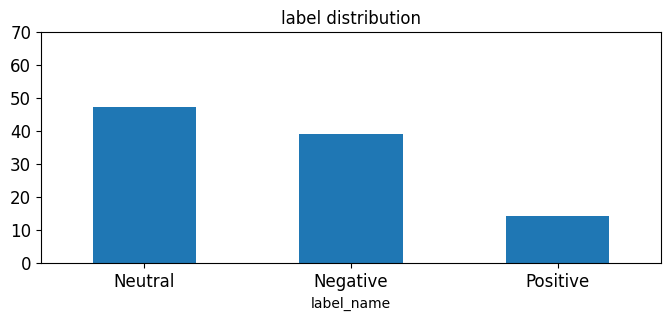

In [39]:
print(df_sample.label_name.value_counts())

# plot barchart for X_sample
df_sample.label_name.value_counts().plot(kind = 'bar',
                                           title = 'label distribution',
                                           ylim = [0, 70], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 7:**

<Axes: title={'center': 'label distribution'}, xlabel='label_name'>

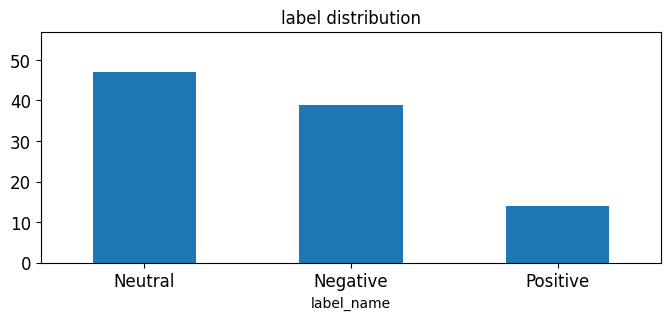

In [40]:
# Answer here
df_sample.label_name.value_counts().plot(kind = 'bar',
                                             title = 'label distribution',
                                             ylim = [0, df_sample.label_name.value_counts().max() + 10], 
                                             rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8:** 

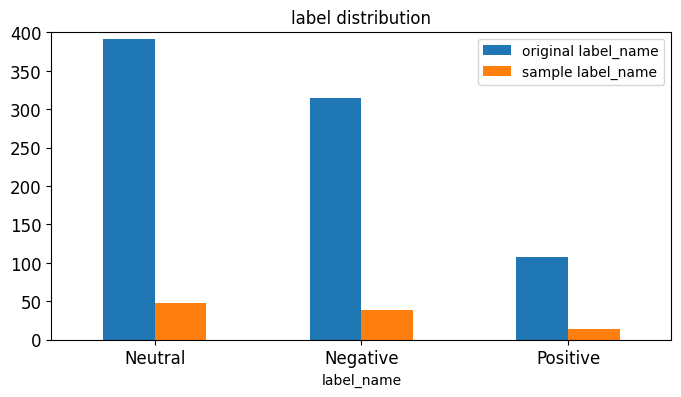

In [41]:
org = df.label_name.value_counts().rename("original label_name")
sample = df_sample.label_name.value_counts().rename("sample label_name")
new_df = pd.concat([org, sample], axis=1)

new_df.plot(kind = 'bar',
        title = 'label distribution',
        ylim = [0, org.max() + 10], 
        rot = 0, fontsize = 12, figsize = (8,4))
plt.show()

### 5.2 Feature Creation

In [42]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adam1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\adam1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [43]:
# takes a like a minute or two to process

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [45]:
df[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [46]:
df[0:4]

,text,label,label_name,unigrams
0,Calls on retards,-1.0,Negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,Neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,Positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [47]:
list(df[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 5.3 Feature subset selection

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


In [56]:
count_vect.get_feature_names_out()[689]

'calls'

In [57]:
count_vect.get_feature_names_out()[2682]

'on'

In [58]:
count_vect.get_feature_names_out()[3220]

'retards'

In [59]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 9:**

In [60]:
analyze(df.text[0])

['calls', 'on', 'retards']

In [61]:
df_counts.shape

(813, 4313)

In [62]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [63]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [64]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### **>>> Exercise 10:**

In [65]:
index = df_counts[4].nonzero()[1]
print(count_vect.get_feature_names_out()[index[1]])

didn


In [66]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [68]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [69]:
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

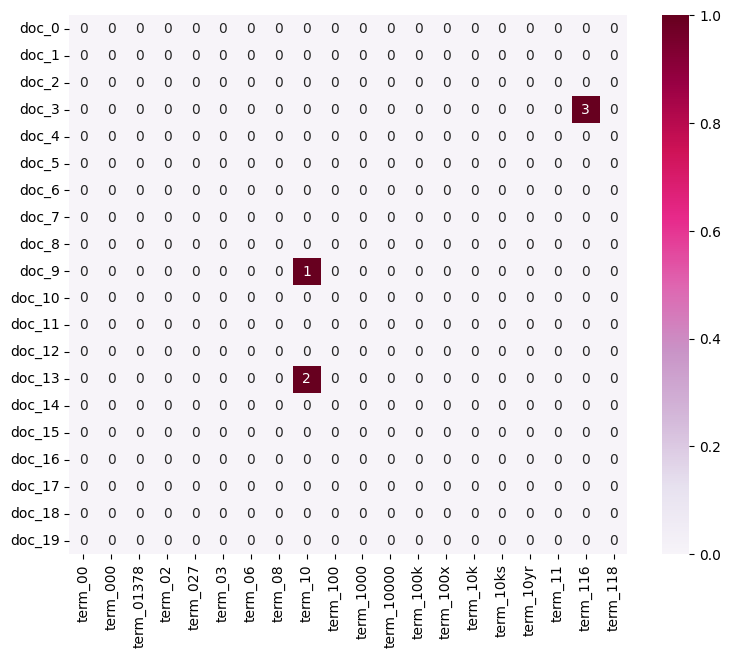

In [70]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11:** 

<Axes: >

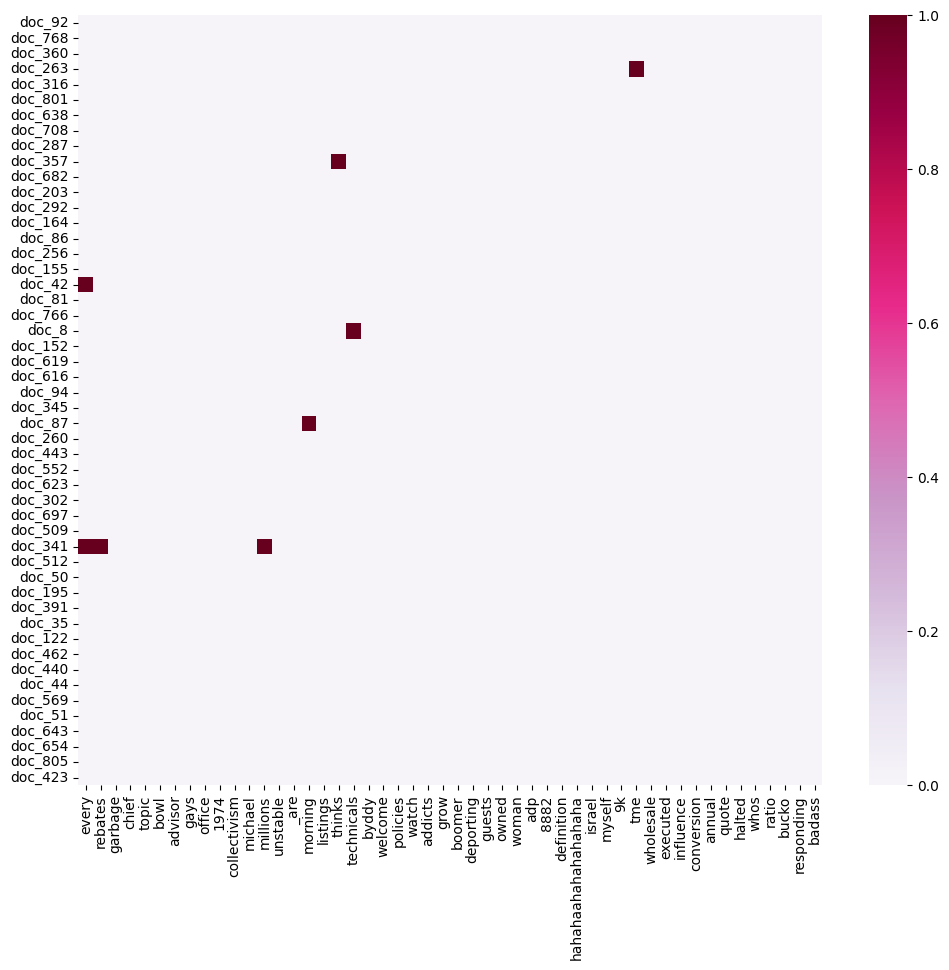

In [72]:
sample_docs = np.random.choice(df_counts.shape[0], 50, replace=False)
sample_terms = np.random.choice(df_counts.shape[1], 50, replace=False)
df_todraw = pd.DataFrame(
    df_counts[sample_docs][:, sample_terms].toarray(),
    index=[f"doc_{i}" for i in sample_docs],
    columns=[count_vect.get_feature_names_out()[j] for j in sample_terms]
)

plt.figure(figsize=(12,10))
sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=df_todraw.values.max(), annot=False)

### 5.4 Attribute Transformation / Aggregation

###  5.4.1 Transform Text Data

In [73]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [74]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [75]:
term_frequencies[0]

np.int64(4)

C:\Users\adam1\AppData\Local\Temp\ipykernel_18912\3140323867.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

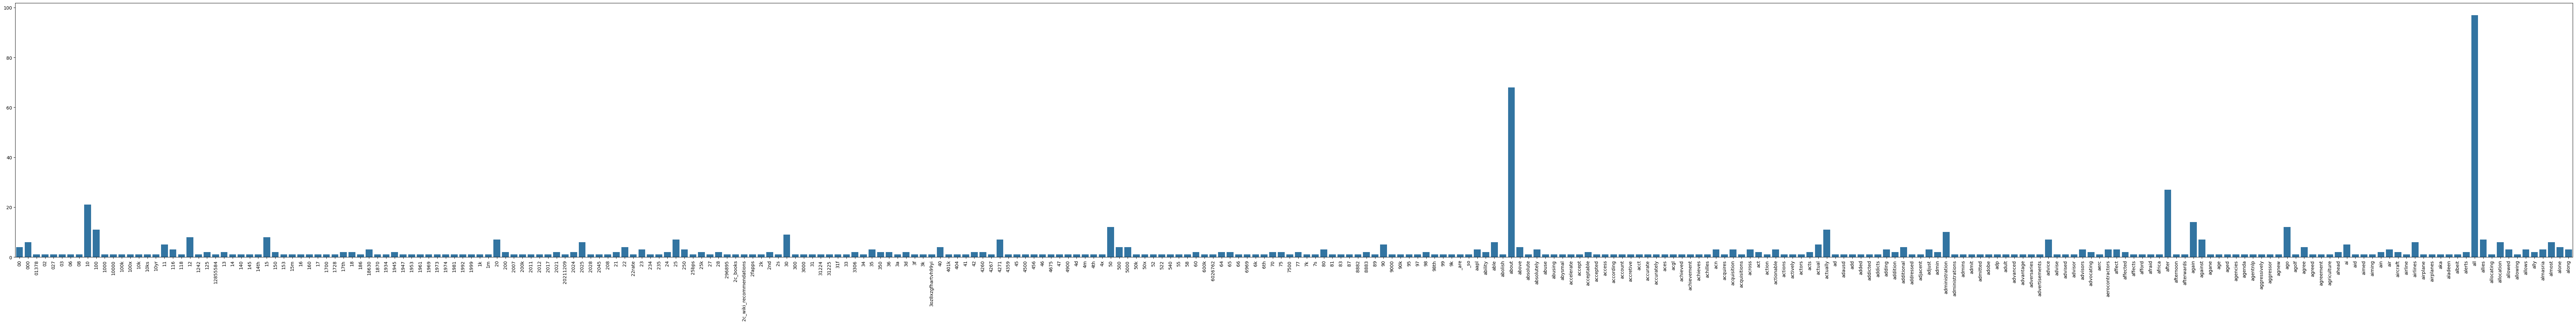

In [76]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 12:**

In [77]:
import plotly.express as px
fig = px.bar(x = count_vect.get_feature_names_out()[:300], 
             y = term_frequencies[:300], 
             title = "Top 50 Terms Frequency",
             labels = {"x": "Term", "y": "Frequency"})

fig.update_layout(xaxis_tickangle = 90, width = 1200, height = 500)

fig.show()

### >>> **Exercise 13:** 

In [79]:
df_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
})

fig = px.bar(df_terms.sample(n = 50, random_state=42), x = "term", y = "frequency",
             title = "Sampple 50 Terms Frequency")

fig.show()


### >>> **Exercise 14:** 

In [80]:
df_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
}).sort_values(by = "frequency", ascending = False)

df_top = df_terms.head(50)

fig = px.bar(df_top, x = "term", y = "frequency",
             title = "Top 50 Terms Frequency")

fig.show()

In [81]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\adam1\AppData\Local\Temp\ipykernel_18912\619071606.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

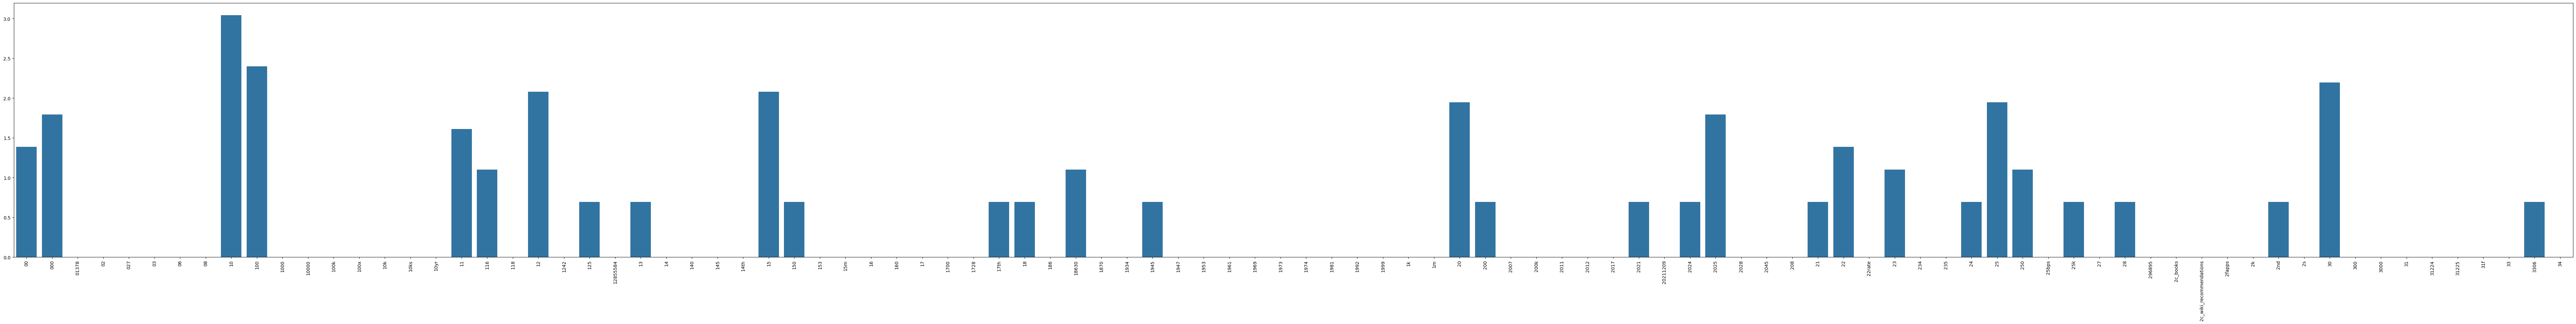

In [83]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100],
                y=term_frequencies_log[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90)

### >>> **Exercise 15:** 

In [85]:
df_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies_log
}).sort_values(by = "frequency", ascending = False)

df_top = df_terms.head(50)

fig = px.bar(df_top, x = "term", y = "frequency",
             title = "Top 50 Terms Frequency Log Scale")

fig.show()

## 6. new data visualizations

Text Length Distribution by Sentiment

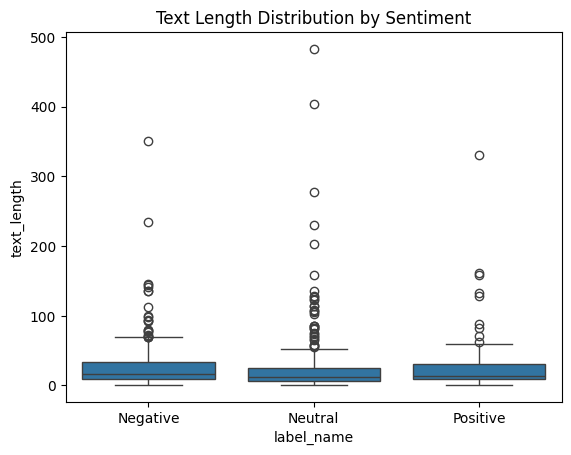

In [ ]:
# Compute the number of words in each text entry
# Create a boxplot to visualize how text length varies across different sentiment labels
# observe
# Most posts are short, with text lengths below 30 words.
# Positive and Negative posts tend to be slightly longer than Neutral ones.
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))
sns.boxplot(data=df, x="label_name", y="text_length")
plt.title("Text Length Distribution by Sentiment")
plt.show()

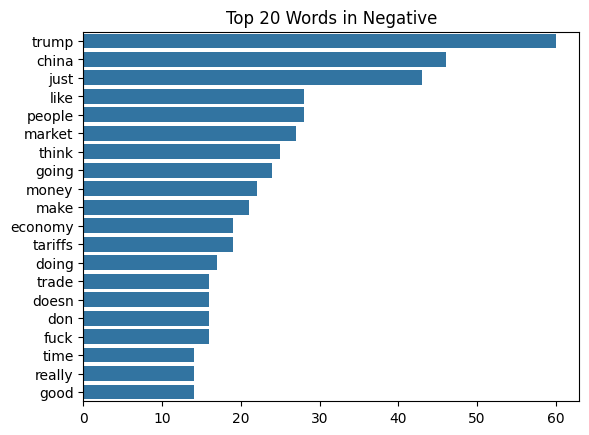

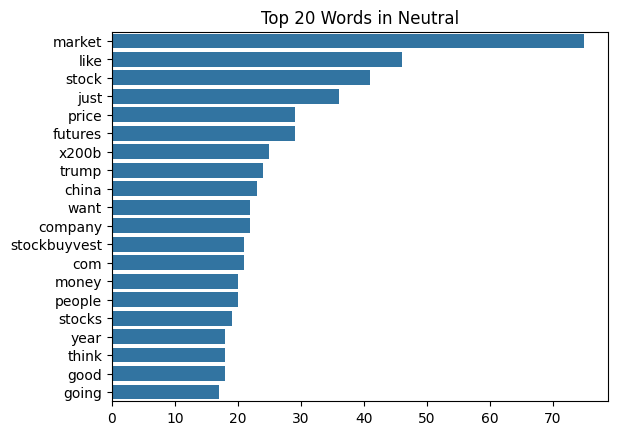

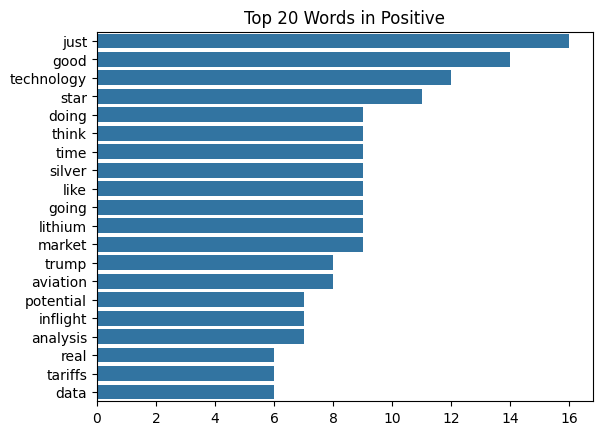

In [ ]:
# For each sentiment labels, compute the frequency of each word and plot the top 20 words in a horizontal bar chart.
# observe
# The word in Negative include "trump", "china". This suggests that negative posts are often related to political or economic topics.
# The word in Neutral include "market", "stock", "price". This reflects an objective tone centered around reporting or observation rather than emotion.
# The word in Positive include "good", "technology", "potential". This suggests optimism toward emerging sectors and technologies.

for label in df["label_name"].unique():
    texts = df[df["label_name"]==label]["text"]
    vec = CountVectorizer(stop_words="english", max_features=20)
    X = vec.fit_transform(texts.astype(str))
    terms = vec.get_feature_names_out()
    freqs = np.asarray(X.sum(axis=0)).flatten()
    sorted_idx = np.argsort(freqs)[::-1][:20]
    terms = terms[sorted_idx]
    freqs = freqs[sorted_idx]

    sns.barplot(x=freqs, y=terms)
    plt.title(f"Top 20 Words in {label}")
    plt.show()

             datetime                                               text  \
0 2025-04-11 17:29:56                                   Calls on retards   
1 2025-04-12 01:12:19  Stunt as in like why did they even make a big ...   
2 2025-04-10 15:09:41                  Seeing lots of red in the ticker.   
3 2023-08-30 17:12:55  Vision Marine Technologies Inc. is rewriting t...   
4 2025-04-11 14:48:05                           He didn’t say thank you.   

   label label_name  
0   -1.0   Negative  
1    0.0    Neutral  
2    0.0    Neutral  
3    1.0   Positive  
4   -1.0   Negative  


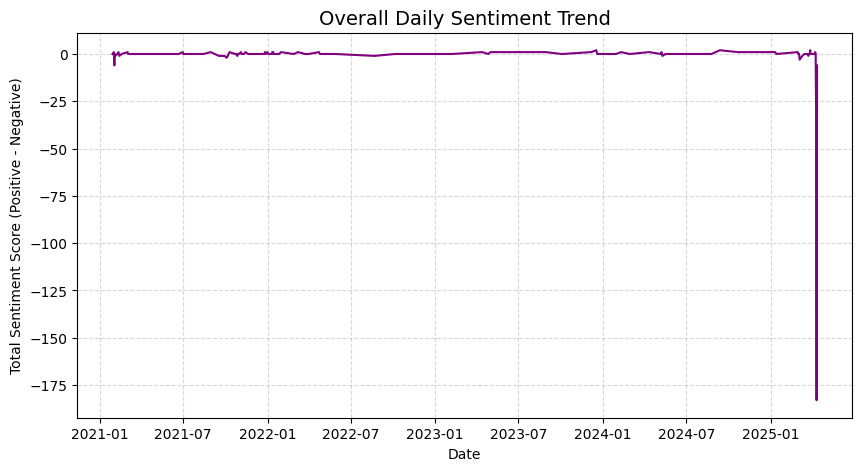

In [ ]:
# Plot daily overall sentiment trend by summing sentiment scores over time
# observe
# A sharp drop appears near early 2025, indicating a surge in negative posts or a sudden event triggering pessimistic discussion.

df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv", parse_dates=["datetime"])
df = df[["datetime", "text", "label"]]
df["label_name"] = df["label"].apply(lambda x: label_map.get(x, "Unknown"))
print(df.head())

df = df.dropna(subset=['datetime'])

daily_sentiment = df.groupby(df['datetime'].dt.date)['label'].sum()


plt.figure(figsize=(10, 5))
plt.plot(daily_sentiment.index, daily_sentiment.values, color='purple', linewidth=1.5)
plt.title("Overall Daily Sentiment Trend", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Sentiment Score (Positive - Negative)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



End of Phase 1

# Phase 2

In [1]:
### Begin Assignment Here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read data
df_X = pd.read_csv("newdataset\Reddit-stock-sentiment.csv")

# categories
categories = ["text", "label"]
df_X= df_X[categories]

In [3]:
# Mapping of numerical labels to text labels
label_map = {
    1.0: "Positive",
    0.0: "Neutral",
   -1.0: "Negative"
}

# add category to the dataframe
df_X["label_name"] = df_X["label"].apply(lambda x: label_map.get(x, "Unknown"))

In [4]:
#Create separate DataFrames for each category
label_names = df_X["label_name"].unique()  # Get unique category labels
label_name_dfs = {}  # Dictionary to store DataFrames for each category

for label_name in label_names:
    # Filter the original DataFrame by category
    label_name_dfs[label_name] = df_X[df_X["label_name"] == label_name].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for label_name in label_names:
    filt_term_document_dfs[label_name] = create_term_document_df(label_name_dfs[label_name])

In [5]:
# Display the filtered DataFrame for one of the label_name, feel free to change the number in the vector
label_name = 0 #You can change it from -1 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {label_names[label_name]}:")
filt_term_document_dfs[label_names[label_name]]

Filtered Term-Document Frequency DataFrame for Category Negative:


,000,02,03,10,100,1000,10000,11,12,13,...,years,yet,yields,yippee,yo,you,your,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


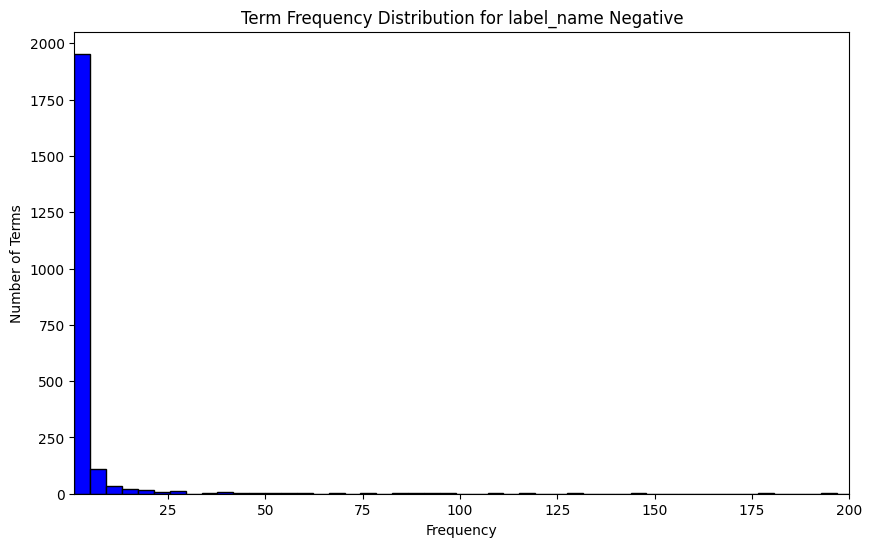

In [6]:
# Sum over all documents to get total frequency for each word
label_name=0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[label_names[label_name]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=100, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for label_name {label_names[label_name]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [7]:
label_name= 0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[label_names[label_name]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[label_names[label_name]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Label_name: {label_names[label_name]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Label_name: Negative
Number of terms in top 5%: 109
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'he', 'will', 'for', 'you', 'be', 'are', 'trump', 'they', 'us', 'on', 'as', 'so', 'not', 'all', 'have', 'china', 'but', 'has', 'just', 'we', 'what', 'if', 'with', 'was', 'at', 'his', 'can', 'their', 'about', 'or', 'even', 'people', 'like', 'no', 'there', 'my', 'market', 'more', 'them', 'think', 'him', 'now', 'going', 'money', 'one', 're', 'make', 'how', 'would', 'an', 'do', 'out', 'than', 'down', 'other', 'from', 'economy', 'up', 'tariffs', 'by', 'then', 'when', 'get', 'doing', 'over', 'some', 'who', 'don', 'been', 'trade', 'doesn', 'fuck', 'see', 'still', 'only', 'why', 'really', 'time', 'any', 'our', 'because', 'world', 'good', 'back', 'american', 'point', 'go', 'wants', 'xi', 'never', 'shit', 'much', 'most', 'your', 'me', 'literally', 'could', 'everyone', 'dollar', 'these']


In [8]:
filt_term_document_dfs[label_names[label_name]].loc[:,'the'].sum(axis=0) 

np.int64(409)

In [9]:
label_name= 0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[label_names[label_name]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[label_names[label_name]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Label_name: {label_names[label_name]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Label_name: Negative
Number of terms in bottom 1%: 21
Filtered terms: ['youtube', '500', 'program', '60', '65', '6k', '6th', '77', '7s', 'programs', 'projection', '98', '9k', '_are', 'aapl', '50', 'yourselves', '2k', '2s', '30', '3000']


In [10]:
filt_term_document_dfs[label_names[label_name]].loc[:,'500'].sum(axis=0) 

np.int64(1)

In [11]:
label_name= 0 #You can change it from 0 to 2
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each label_name
term_document_dfs = {}

for label in label_names:
    print(f'\nFor label_name {label} we filter the following words:')
    term_document_dfs[label] = filter_top_bottom_words_by_sum(filt_term_document_dfs[label])
# Example: Display the filtered DataFrame for one of the label_name
print(f"Filtered Term-Document Frequency DataFrame for label_name {label_names[label_name]}:")
term_document_dfs[label_names[label_name]]



For label_name Negative we filter the following words:
Bottom 1.0% words: 
youtube       1
500           1
program       1
60            1
65            1
6k            1
6th           1
77            1
7s            1
programs      1
projection    1
98            1
9k            1
_are          1
aapl          1
50            1
yourselves    1
2k            1
2s            1
30            1
3000          1
dtype: int64
Top 5.0% words: 
these         11
dollar        11
everyone      12
could         12
literally     12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For label_name Neutral we filter the following words:
Bottom 1.0% words: 
186         1
18630       1
1870        1
1k          1
1m          1
2028        1
yahoo       1
yall        1
yea         1
worked      1
2045        1
208         1
21          1
22rate      1
23          1
234         1
2012        1
2017        1
20211209    1
14  

,000,02,03,10,100,1000,10000,11,12,13,...,ya,yea,yeah,year,years,yet,yields,yippee,yo,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 16 (take home):** 

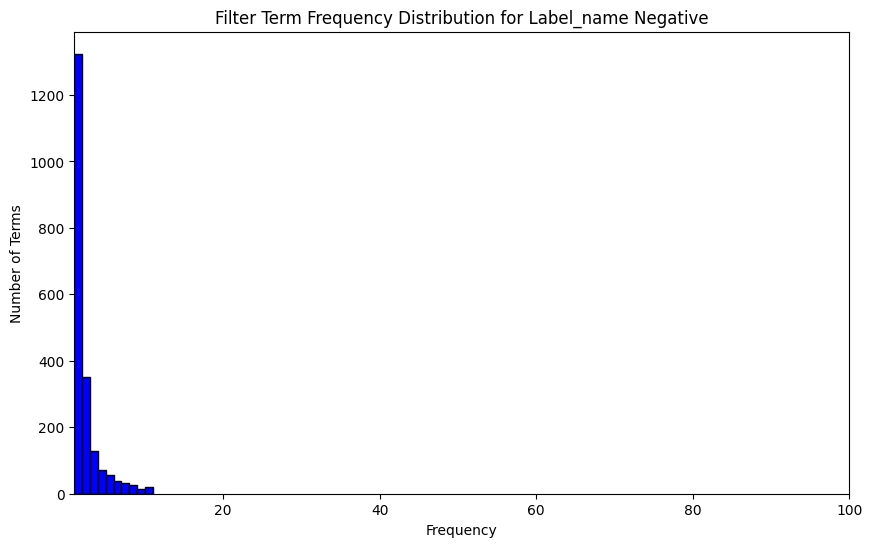

In [12]:
label_name=0#You can change it from 0 to 3
word_counts = term_document_dfs[label_names[label_name]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=10, color='blue', edgecolor='black')
plt.title(f'Filter Term Frequency Distribution for Label_name {label_names[label_name]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 100)
plt.show()
# Apply the filtering function to each label_name
# The resulting distribution is substantially more concentrated, indicating that the extreme frequencies have been effectively removed.

In [13]:
import os
output_dir = "D:\\2025DM\\DM2025Labs\\DM2025-Lab1-Exercise"
os.chdir(output_dir)
def dataframe_to_transactions(term_document_df, threshold=1):
    transactions = []
    for _, row in term_document_df.iterrows():
        transaction = row[row >= threshold].index.tolist()
        transactions.append(transaction)
    return transactions

def save_transactions_to_csv(transactions, output_path):
    with open(output_path, 'w', encoding='utf-8') as f:
        for transaction in transactions:
            f.write(','.join(transaction) + '\n')

#
for label_name, df in term_document_dfs.items():
    transactions = dataframe_to_transactions(df, threshold=1)
    output_file = (f"td_freq_newdataset_db_{label_name}.csv")
    save_transactions_to_csv(transactions, output_file)
    print(f"saved to {output_file}")


saved to td_freq_newdataset_db_Negative.csv
saved to td_freq_newdataset_db_Neutral.csv
saved to td_freq_newdataset_db_Positive.csv


In [14]:
from PAMI.extras.convert.DF2DB import DF2DB            
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open
# Loop through the dictionary of term-document DataFrames
for label in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    label_safe = label.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[label])           
        
    obj.convert2TransactionalDatabase(f'td_freq_newdataset_db_{label}.csv', '>=', 1)


Database size (total no of transactions) : 315
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.82857142857143
Maximum Transaction Size : 139
Standard Deviation Transaction Size : 13.325085884608757
Variance in Transaction Sizes : 178.1233848953594
Sparsity : 0.9942635444090342


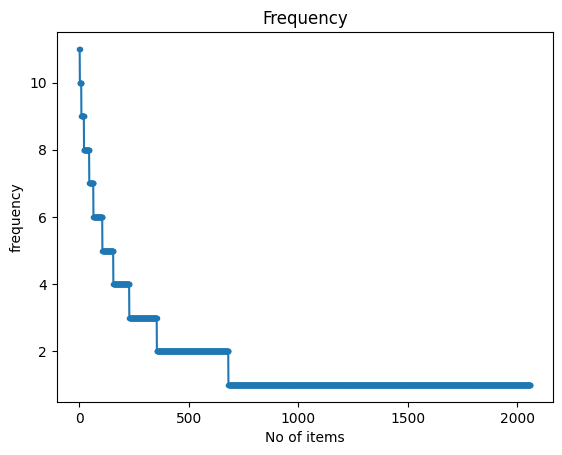

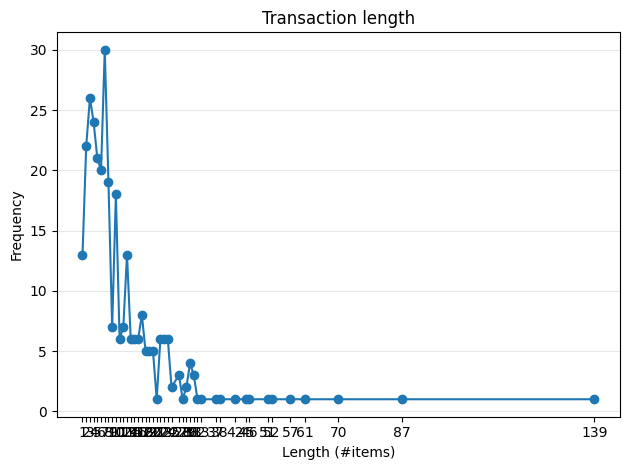

In [15]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_newdataset_db_Negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 417
Number of items : 2586
Minimum Transaction Size : 1
Average Transaction Size : 10.764988009592326
Maximum Transaction Size : 201
Standard Deviation Transaction Size : 18.265492673393037
Variance in Transaction Sizes : 334.4302135214905
Sparsity : 0.99583720494602


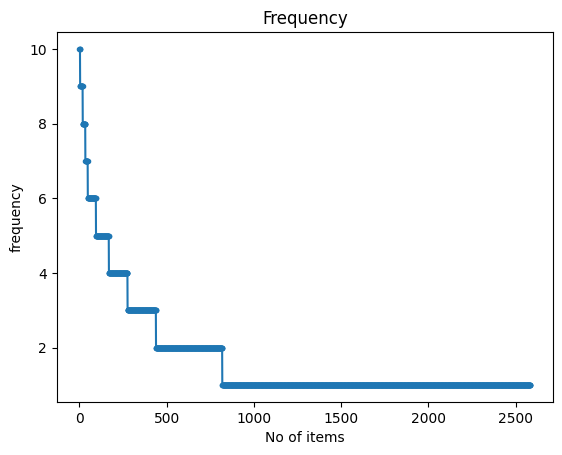

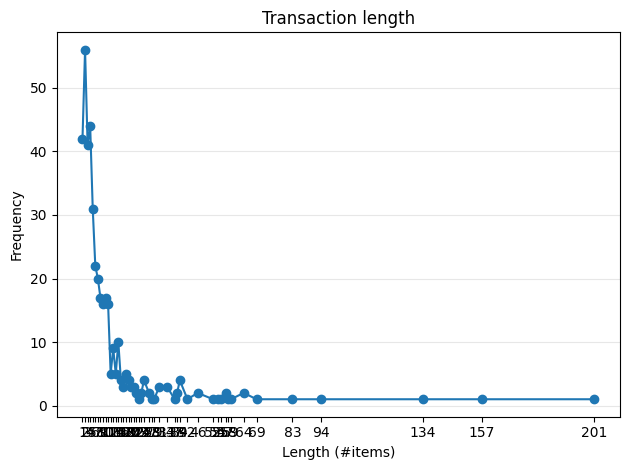

In [16]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_newdataset_db_Neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 108
Number of items : 1103
Minimum Transaction Size : 1
Average Transaction Size : 14.287037037037036
Maximum Transaction Size : 92
Standard Deviation Transaction Size : 16.835286424609123
Variance in Transaction Sizes : 286.07571824160607
Sparsity : 0.9870471105738559


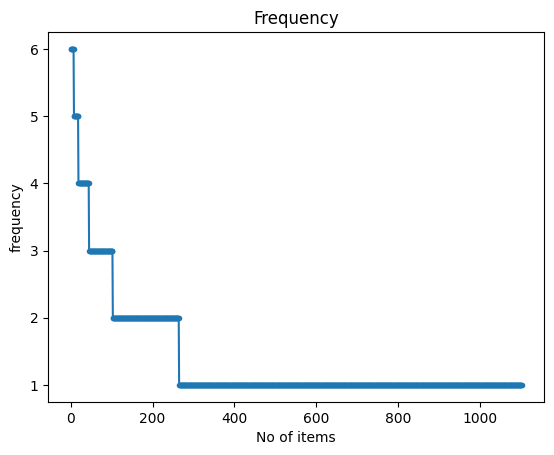

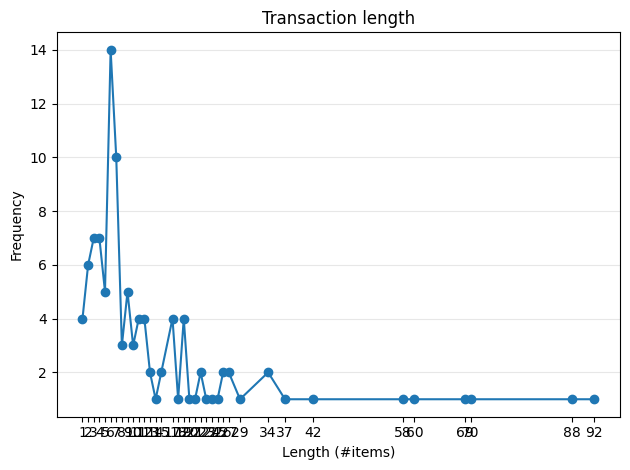

In [17]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_newdataset_db_Positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [18]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj1 = alg.FPGrowth(iFile='td_freq_newdataset_db_Positive.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_Positive= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_Positive))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 110
Runtime: 0.00304412841796875


In [19]:
obj1.save('freq_patterns_newdataset_Positive_minSup3.txt') #save the patterns
frequentPatternsDF_Positive

,Patterns,Support
0,come,3
1,electric,3
2,electric\tyour,3
3,ll,3
4,main,3
...,...,...
105,them,6
106,out,6
107,see,6
108,economy,6


In [20]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj2 = alg.FPGrowth(iFile='td_freq_newdataset_db_Negative.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_Negative= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_Negative))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 400
Runtime: 0.012623071670532227


In [21]:
obj2.save('freq_patterns_newdataset_Negative_minSup3.txt') #save the patterns
frequentPatternsDF_Negative

,Patterns,Support
0,personally,3
1,starting,3
2,honestly,3
3,exactly,3
4,square,3
...,...,...
395,should,10
396,bad,10
397,again,10
398,already,11


In [22]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj3 = alg.FPGrowth(iFile='td_freq_newdataset_db_Neutral.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_Neutral= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_Neutral))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 99
Runtime: 0.007434368133544922


In [23]:
obj3.save('freq_patterns_newdataset_Neutral_minSup9.txt') #save the patterns
frequentPatternsDF_Neutral

,Patterns,Support
0,big,6
1,talk,6
2,months,6
3,probably,6
4,doing,6
...,...,...
94,few,9
95,let,10
96,most,10
97,go,10


In [24]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_Neutral, frequentPatternsDF_Negative, frequentPatternsDF_Positive]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

          Patterns  Support
372          again       10
371           sure       10
45            most       10
43          reddit        9
44          weekly        9
..             ...      ...
53           place        3
406            god        3
407          trade        3
410      would\tus        3
415  want\teconomy        3

[438 rows x 2 columns]
Number of patterns discarded: 171


In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(df_X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df_X['tokenized_text'] = df_X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df_X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df_X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df_X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,honestly,exactly,square,forward,hard,place,god,trade,would\tus,want\teconomy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 17 (take home):** 

In [26]:
# Basic FPGrowth
from PAMI.frequentPattern.basic import FPGrowth as alg
base_minsup_values = [6,9]
basic_results = {}
for minsup in base_minsup_values:
    obj_basic = alg.FPGrowth(iFile='td_freq_newdataset_db_Neutral.csv', minSup=minsup)
    obj_basic.mine()
    basic_patterns_df = obj_basic.getPatternsAsDataFrame()
    basic_results[minsup] = {'patterns_df': basic_patterns_df, 'runtime': obj_basic.getRuntime()}
    print(f'Basic FPGrowth patterns found with minSup={minsup}: ' + str(len(basic_patterns_df)))
    print('Runtime: ' + str(obj_basic.getRuntime()))  

# FAE Top-k
from PAMI.frequentPattern.topk import FAE as alg_topk
k_values = [100, 200]
topk_results = {}
for k in k_values:
    obj_topk = alg_topk.FAE(iFile='td_freq_newdataset_db_Neutral.csv', k=k)
    obj_topk.mine()
    topk_patterns_df = obj_topk.getPatternsAsDataFrame()
    topk_results[k] = {'patterns_df': topk_patterns_df, 'runtime': obj_topk.getRuntime()}
    print(f'Top-{k} patterns found: ' + str(len(topk_patterns_df)))
    print('Runtime: ' + str(obj_topk.getRuntime()))  

# MaxFP Growth
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg_maxfp
minsup_values = [6, 9]
maxfp_results = {}
for minsup in minsup_values:
    obj_maxfp = alg_maxfp.MaxFPGrowth(iFile='td_freq_newdataset_db_Neutral.csv', minSup=minsup)
    obj_maxfp.mine()
    maxfp_patterns_df = obj_maxfp.getPatternsAsDataFrame()
    maxfp_results[minsup] = {'patterns_df': maxfp_patterns_df, 'runtime': obj_maxfp.getRuntime()}
    print(f'MaxFP patterns found with minSup={minsup}: ' + str(len(maxfp_patterns_df)))
    print('Runtime: ' + str(obj_maxfp.getRuntime()))  



Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Basic FPGrowth patterns found with minSup=6: 99
Runtime: 0.007323026657104492
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Basic FPGrowth patterns found with minSup=9: 19
Runtime: 0.002414226531982422
 TopK frequent patterns were successfully generated using FAE algorithm.
Top-100 patterns found: 100
Runtime: 0.008074045181274414
 TopK frequent patterns were successfully generated using FAE algorithm.
Top-200 patterns found: 200
Runtime: 0.6687109470367432
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFP patterns found with minSup=6: 93
Runtime: 0.003509521484375
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFP patterns found with minSup=9: 18
Runtime: 0.0033032894134521484


In [29]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)   
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

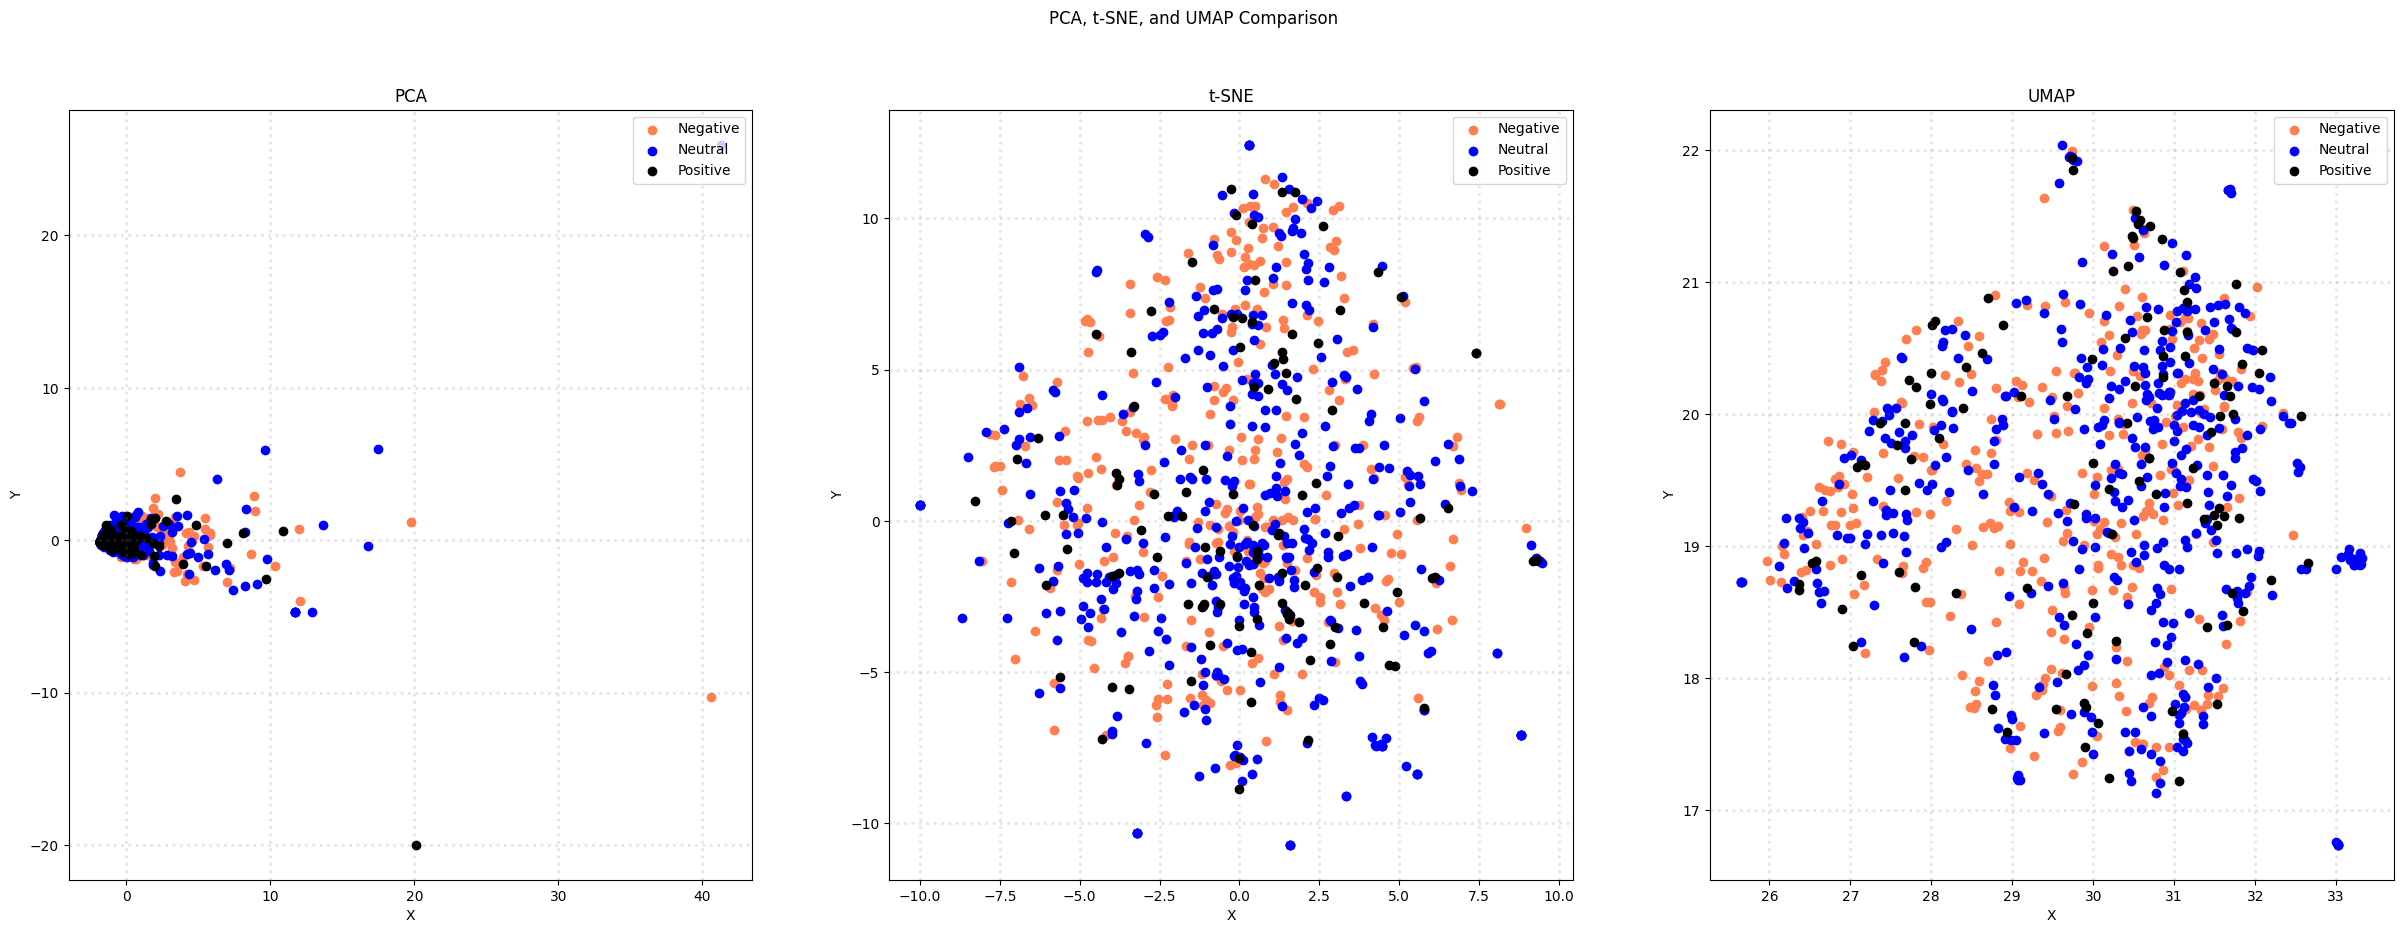

In [30]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
label_names = df_X['label_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, label in zip(col, label_names):
        xs = X_reduced[df_X['label_name'] == label].T[0]
        ys = X_reduced[df_X['label_name'] == label].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=label)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [31]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

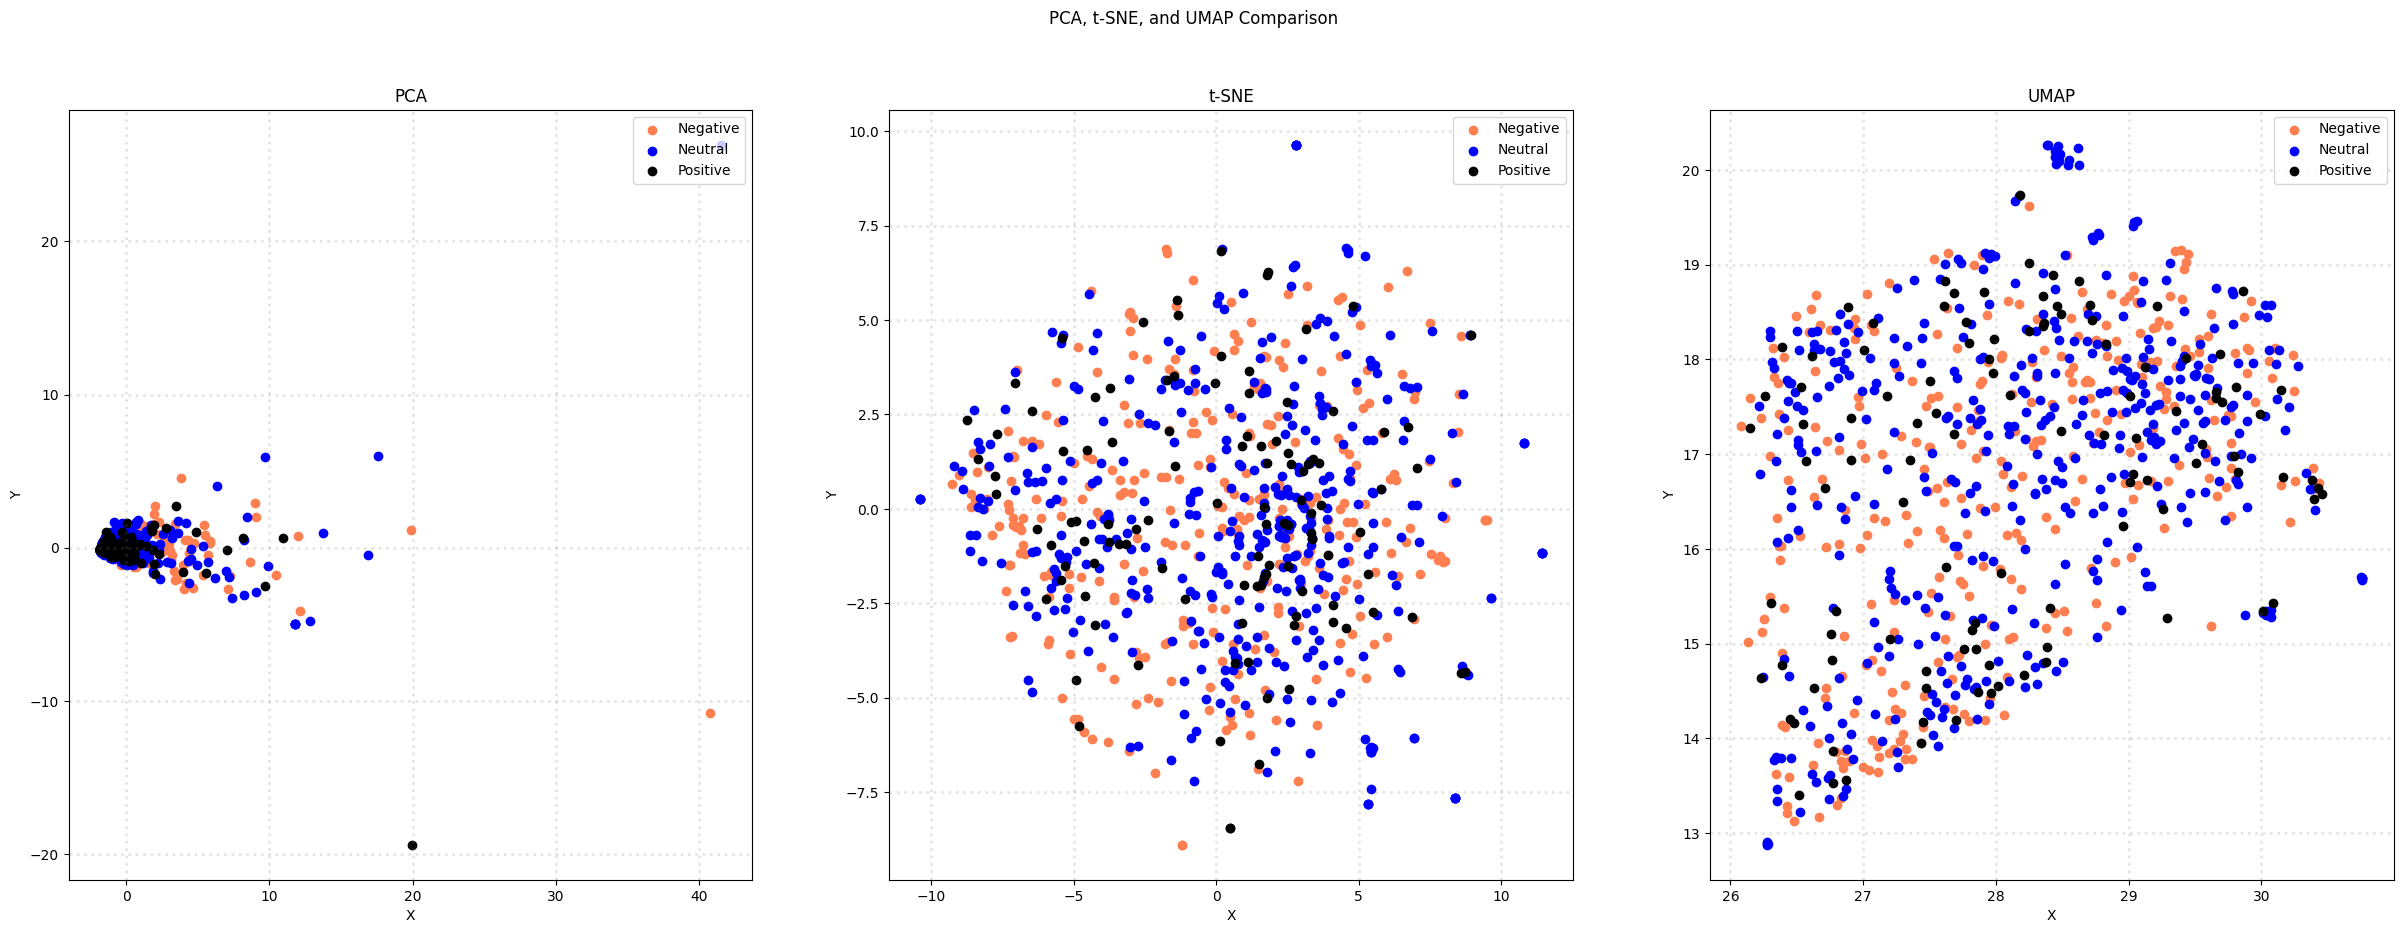

In [32]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
label_names = df_X['label_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, label in zip(col, label_names):
        xs = X_reduced[df_X['label_name'] == label].T[0]
        ys = X_reduced[df_X['label_name'] == label].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=label)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### >>> Exercise 18 (take home):

PCA done.
t-SNE done.
UMAP done.

--- Generating Figure 1: Angle 1 (Standard) ---


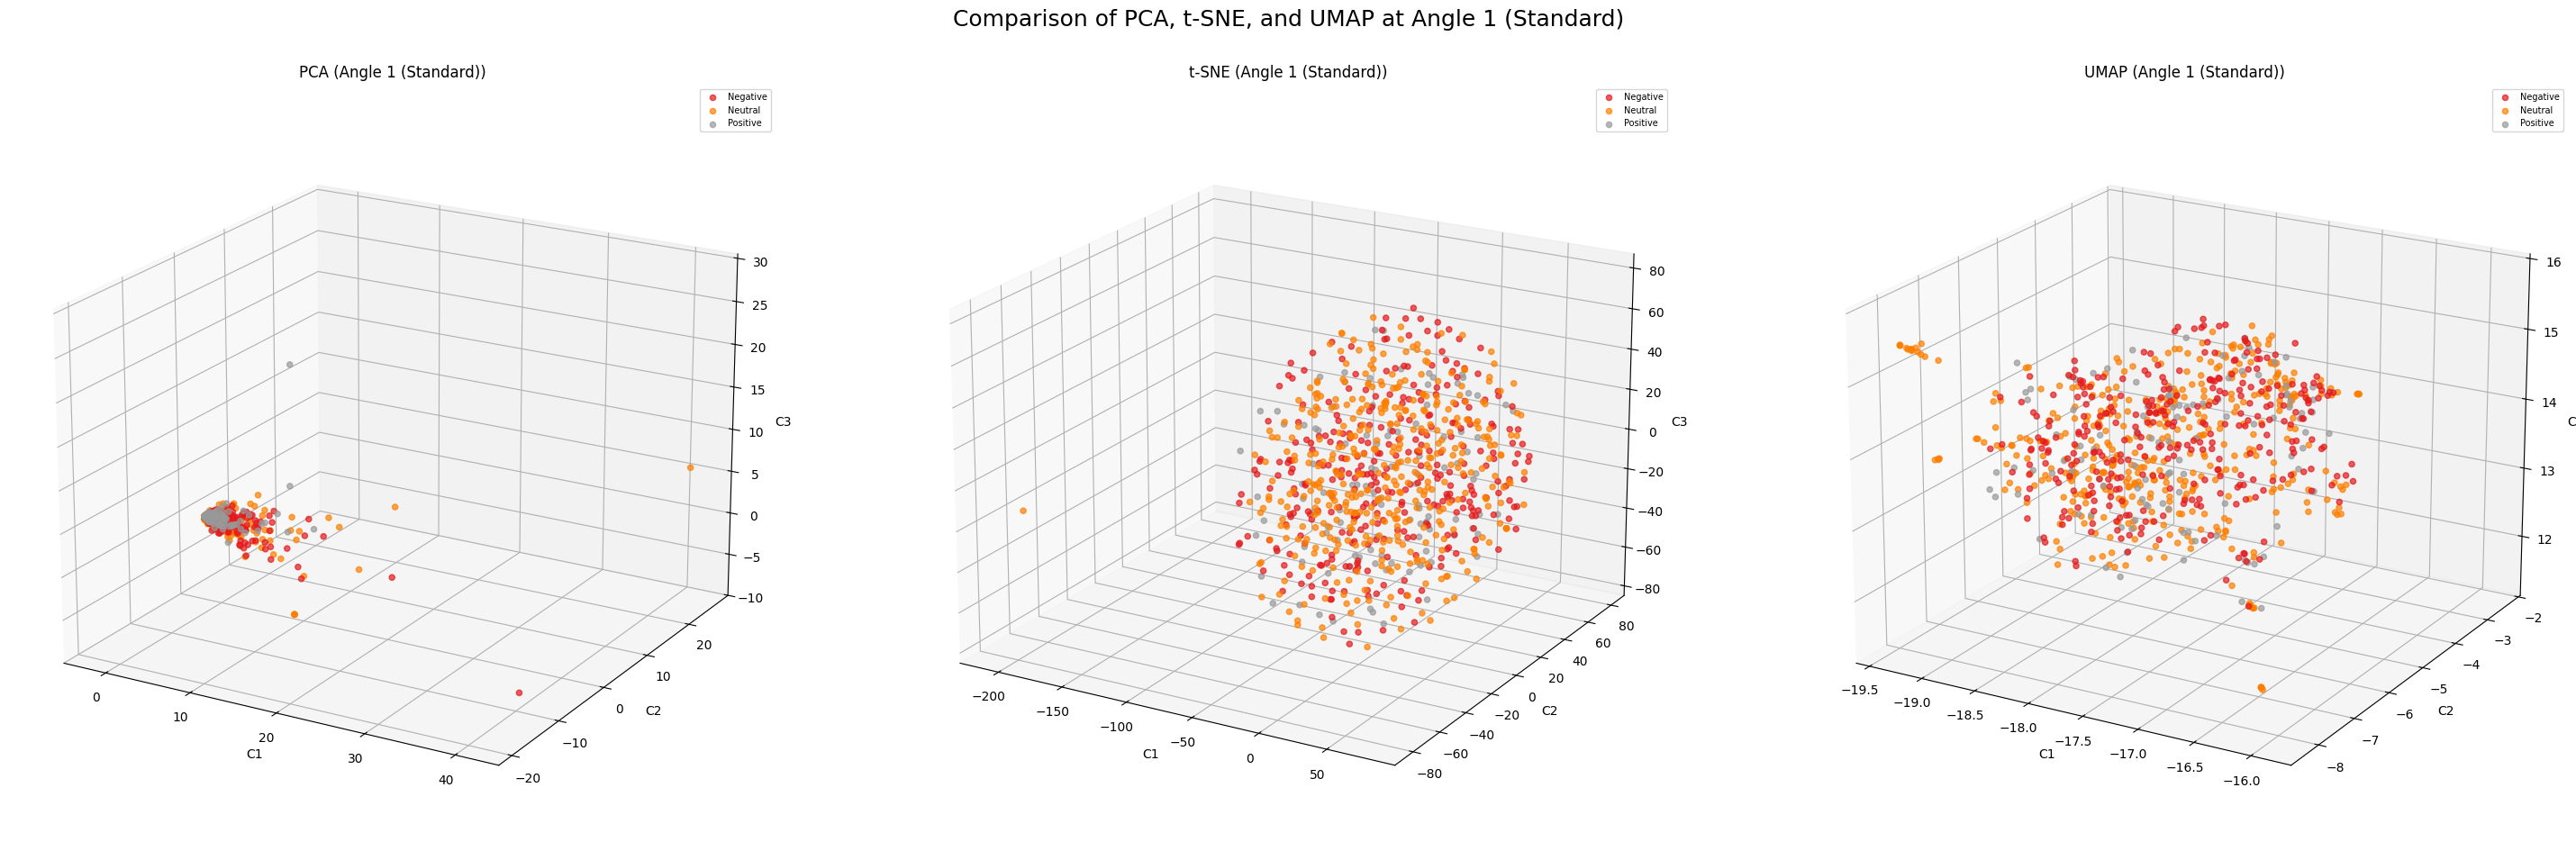


--- Generating Figure 2: Angle 2 (Top-Down) ---


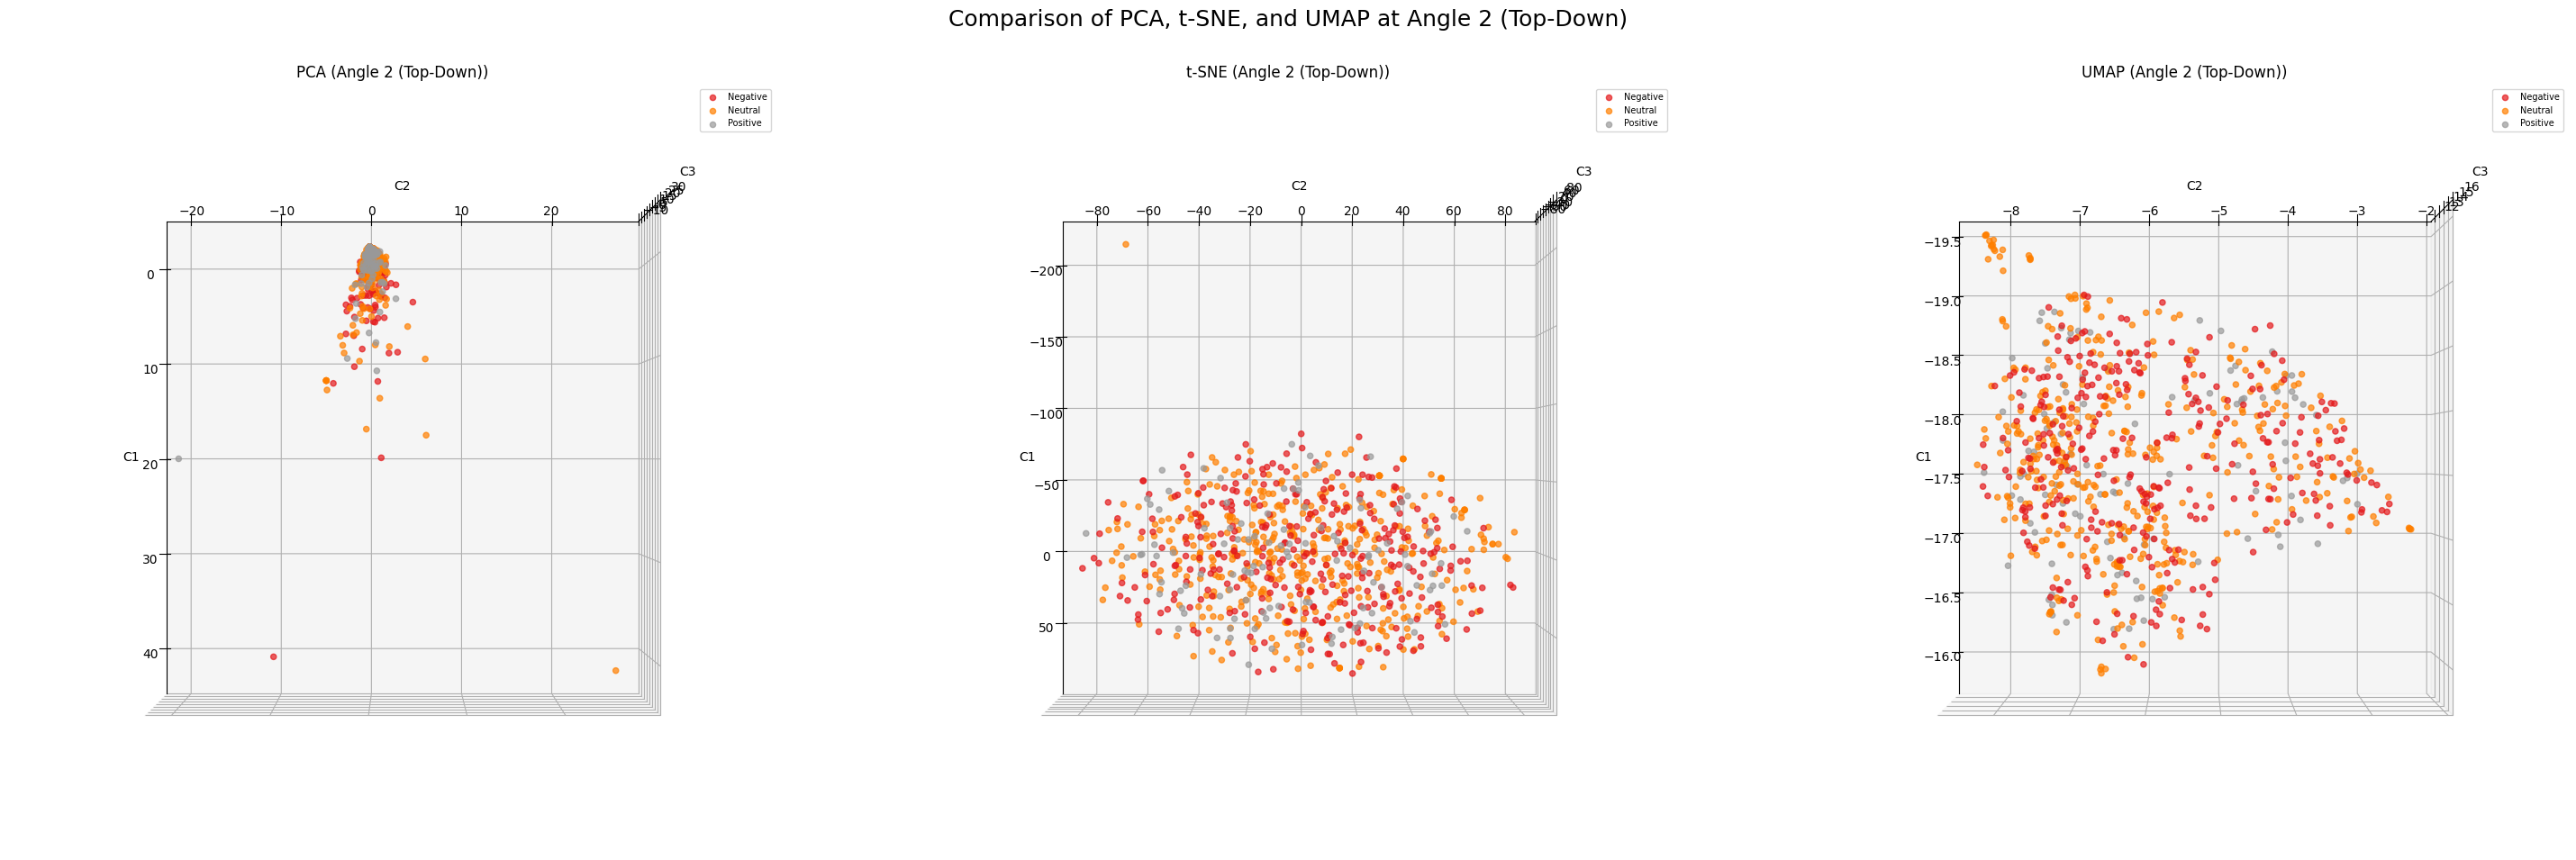


--- Generating Figure 3: Angle 3 (Side View) ---


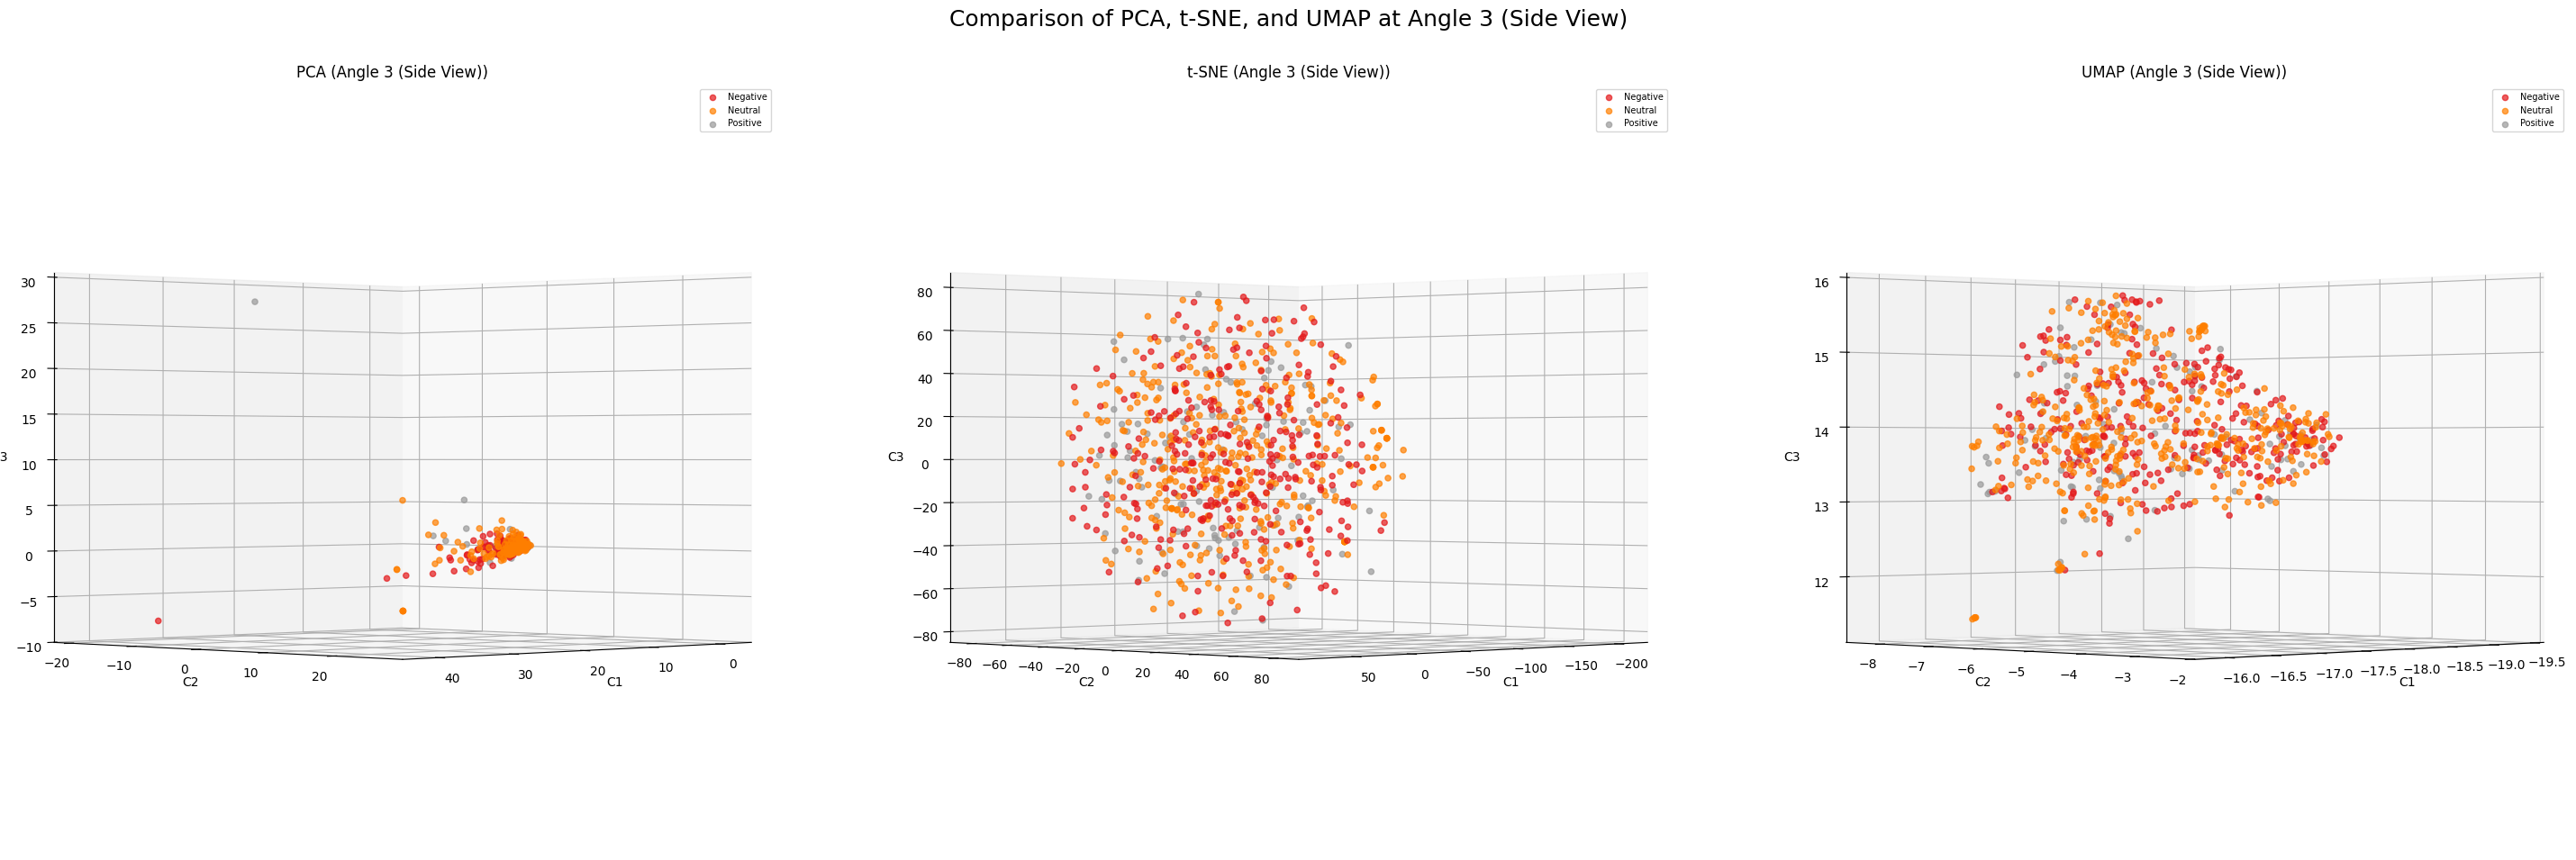

In [34]:

# PCA
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
print("PCA done.")

# t-SNE
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
print("t-SNE done.")

# UMAP
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)
print("UMAP done.")

# prepare colors and categories
label_names = df_X['label_name'].unique() 
num_label_names = len(label_names)
cmap = plt.colormaps.get_cmap('Set1') 
col = [cmap(i) for i in np.linspace(0, 1, num_label_names)]

# define a function to plot 3D scatter plots
def plot_scatter_3d(fig, subplot_index, X_reduced, title, label_data, colors, label_list, elev, azim):
    ax = fig.add_subplot(1, 3, subplot_index, projection='3d')
    
    for c, label in zip(colors, label_list):
        indices = label_data == label
        xs = X_reduced[indices, 0]
        ys = X_reduced[indices, 1]
        zs = X_reduced[indices, 2]
        
        ax.scatter(xs, ys, zs, color=c, marker='o', label=label, alpha=0.7)
        
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('C1')
    ax.set_ylabel('C2')
    ax.set_zlabel('C3')
    ax.legend(loc='best', fontsize=7)
    
    # set view angle
    ax.view_init(elev=elev, azim=azim)
    
    return ax

# define the 3 viewing angles
views = [
    {'name': 'Angle 1 (Standard)', 'elev': 20, 'azim': -60},
    {'name': 'Angle 2 (Top-Down)', 'elev': 90, 'azim': 0},
    {'name': 'Angle 3 (Side View)', 'elev': 0, 'azim': 45}
]

# prepare reduced data dictionary
reduced_data = {
    'PCA': X_pca_aug_3d,
    't-SNE': X_tsne_aug_3d,
    'UMAP': X_umap_aug_3d
}

# generate plots for each viewing angle
for i, view in enumerate(views):
    fig = plt.figure(figsize=(30, 10))
    fig.suptitle(f"Comparison of PCA, t-SNE, and UMAP at {view['name']}", fontsize=18)
    
    print(f"\n--- Generating Figure {i+1}: {view['name']} ---")
    
    # plot each method in a subplot
    for j, (method_name, data) in enumerate(reduced_data.items()):
        
        plot_scatter_3d(
            fig, 
            j + 1,
            data, 
            f"{method_name} ({view['name']})", 
            df_X['label_name'], col, label_names,
            elev=view['elev'], 
            azim=view['azim']
        )
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show() 


In [35]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [36]:
mlb = preprocessing.LabelBinarizer()

In [37]:
mlb.fit(df_X.label)

LabelBinarizer()

In [40]:
df_X['bin_label'] = mlb.transform(df_X['label']).tolist()
df_X.head()

,text,label,label_name,tokenized_text,bin_label
0,Calls on retards,-1.0,Negative,"{on, retards, Calls}","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,0.0,Neutral,"{deal, place?, about, did, make, first, should...","[0, 1, 0]"
2,Seeing lots of red in the ticker.,0.0,Neutral,"{Seeing, of, the, lots, ticker., red, in}","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,Positive,"{water!, record, to, Their, isn't, Inc., Techn...","[0, 0, 1]"
4,He didn’t say thank you.,-1.0,Negative,"{didn’t, say, you., He, thank}","[1, 0, 0]"


### >>> **Exercise 19 (take home):**

In [41]:
mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(df_X.label_name)
bin_label_name = mlb2.transform(df_X['label_name']).tolist()
bin_label_name[0:5]

[[1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]]

In [43]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df_X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_X.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [44]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']
['Everyone is talking about the Bond market. But the rates for the bond market are still lower than the rates they had earlier this year.\r\n\r\nWhat is everyone talking about?']


In [45]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [46]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.109109
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.142857
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\adam1\AppData\Local\Temp\ipykernel_26408\452772485.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
C:\Users\adam1\AppData\Local\Temp\ipykernel_26408\452772485.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
C:\Users\adam1\AppData\Local\Temp\ipykernel_26408\452772485.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this oper

### >>> **Exercise 20 (take home):**

In [49]:
doc_neg_1 = df_X.loc[df_X[df_X['label_name'] == 'Negative'].index[0], 'text']
doc_neg_2 = df_X.loc[df_X[df_X['label_name'] == 'Negative'].index[1], 'text']
doc_neu_1 = df_X.loc[df_X[df_X['label_name'] == 'Neutral'].index[0], 'text']
doc_pos_1 = df_X.loc[df_X[df_X['label_name'] == 'Positive'].index[0], 'text']

docs = [doc_neg_1, doc_neg_2, doc_neu_1, doc_pos_1]
doc_vectors = count_vect.transform(docs)

cos_sim_matrix = cosine_similarity(doc_vectors)

labels = ['Neg1', 'Neg2', 'Neutral', 'Positive']
cos_df = pd.DataFrame(cos_sim_matrix, index=labels, columns=labels)

print("Cosine Similarity Matrix:")
print(cos_df.round(4))


🔍 Cosine Similarity Matrix:
            Neg1  Neg2  Neutral  Positive
Neg1      1.0000   0.0   0.0000    0.0585
Neg2      0.0000   1.0   0.0000    0.0000
Neutral   0.0000   0.0   1.0000    0.1882
Positive  0.0585   0.0   0.1882    1.0000


In [50]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df_X[['label', 'label_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df_X['label'], test_size=0.3, random_state=42)

In [51]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.592156862745098

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5854    0.7347    0.6516        98
     Neutral     0.6393    0.6446    0.6420       121
    Positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4416    0.4690    0.4457       255
weighted avg     0.5425    0.5922    0.5612       255



### >>> **Exercise 21 (take home):**

In [53]:
# Create a mapping from numerical labels to category names
label_mapping = dict(df_X[['label', 'label_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [label_mapping[label] for label in sorted(label_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df_X['label'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Using Augmented Data with Patterns:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Using Augmented Data with Patterns:
Accuracy: 0.596078431372549

Classification Report:
               precision    recall  f1-score   support

    Negative     0.6000    0.7347    0.6606        98
     Neutral     0.6371    0.6529    0.6449       121
    Positive     0.0909    0.0278    0.0426        36

    accuracy                         0.5961       255
   macro avg     0.4427    0.4718    0.4493       255
weighted avg     0.5457    0.5961    0.5659       255



In [54]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df_X['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.49019607843137253

Classification Report:
               precision    recall  f1-score   support

    Negative     0.4878    0.4082    0.4444        98
     Neutral     0.5294    0.6694    0.5912       121
    Positive     0.2000    0.1111    0.1429        36

    accuracy                         0.4902       255
   macro avg     0.4057    0.3962    0.3928       255
weighted avg     0.4669    0.4902    0.4715       255



### >>> **Exercise 24 (take home):**

In [55]:
# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df_X['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Using Augmented Data with Patterns:")
print("Decision Tree Accuracy (augmented TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))


Using Augmented Data with Patterns:
Decision Tree Accuracy (augmented TDM): 0.5019607843137255

Classification Report:
               precision    recall  f1-score   support

    Negative     0.4875    0.3980    0.4382        98
     Neutral     0.5250    0.6942    0.5979       121
    Positive     0.3333    0.1389    0.1961        36

    accuracy                         0.5020       255
   macro avg     0.4486    0.4104    0.4107       255
weighted avg     0.4835    0.5020    0.4798       255



In [65]:
X_train.shape

(592, 4784)

### >>> **TF-IDF**


In [96]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [97]:
X_text = df_X['text'].values
y_labels = df_X['label_name'].values
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X_text)


In [98]:
# TF-IDF features
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_labels, test_size=0.3, random_state=42)

In [99]:
# Train Bernoulli Naive Bayes classifier
nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# Predict and evaluate
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
print(f"Accuracy of Naive Bayes classifier with TF-IDF features: {accuracy_tfidf:.4f}")
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf, target_names=target_names, digits=4))

Accuracy of Naive Bayes classifier with TF-IDF features: 0.5216

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5574    0.6939    0.6182        98
     Neutral     0.6058    0.5207    0.5600       121
    Positive     0.0690    0.0556    0.0615        36

    accuracy                         0.5216       255
   macro avg     0.4107    0.4234    0.4132       255
weighted avg     0.5114    0.5216    0.5120       255



In [81]:
# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df_X['label'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = nb_classifier.predict(X_test)
print("Accuracy of Naive Bayes classifier with frequency features:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))


Accuracy of Naive Bayes classifier with frequency features: 0.592156862745098

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5854    0.7347    0.6516        98
     Neutral     0.6393    0.6446    0.6420       121
    Positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4416    0.4690    0.4457       255
weighted avg     0.5425    0.5922    0.5612       255



In [83]:
# Split the data (already done above, but shown here for clarity)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, df_X['label'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# Predict and evaluate
y_pred_dt_aug = nb_classifier_aug.predict(X_test_aug)
print("Accuracy of Naive Bayes classifier with Aug frequency features:", accuracy_score(y_test_aug, y_pred_dt_aug))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_dt_aug, target_names=target_names, digits=4))


Accuracy of Naive Bayes classifier with Aug frequency features: 0.596078431372549

Classification Report:
               precision    recall  f1-score   support

    Negative     0.6000    0.7347    0.6606        98
     Neutral     0.6371    0.6529    0.6449       121
    Positive     0.0909    0.0278    0.0426        36

    accuracy                         0.5961       255
   macro avg     0.4427    0.4718    0.4493       255
weighted avg     0.5457    0.5961    0.5659       255



### **somethings that are not ideal or the most efficient/meaningful**

#### faster 

In [90]:
# Filter the bottom  and top  words

from sklearn.feature_extraction.text import TfidfVectorizer # 1. 改用 TF-IDF

# 2. 初始化 TfidfVectorizer 並設定參數
# Remove stop words first.
# Here we set min_df to 5 to ignore words that appear in less than 5 documents
# and max_df to 0.8 to ignore words that appear in more than 80% of the documents.
vectorizer_improved = TfidfVectorizer(
    stop_words='english',  
    min_df=5,              
    max_df=0.8,            
    ngram_range=(1, 2)     
)

X_improved = vectorizer_improved.fit_transform(df_X['text'])
y = df_X['label'] 

print("Improved TF-IDF feature matrix shape:", X_improved)


Improved TF-IDF feature matrix shape:   (np.int32(0), np.int32(60))	1.0
  (np.int32(1), np.int32(238))	0.2556200794937825
  (np.int32(1), np.int32(111))	0.3339246417903567
  (np.int32(1), np.int32(262))	0.31062922388671577
  (np.int32(1), np.int32(43))	0.35915029454074165
  (np.int32(1), np.int32(106))	0.3846295061458763
  (np.int32(1), np.int32(305))	0.4056739262492641
  (np.int32(1), np.int32(86))	0.3472617656589939
  (np.int32(1), np.int32(392))	0.4056739262492641
  (np.int32(2), np.int32(354))	0.595782716606822
  (np.int32(2), np.int32(258))	0.5803502782101256
  (np.int32(2), np.int32(335))	0.5551905161059807
  (np.int32(3), np.int32(238))	0.12388408275906886
  (np.int32(3), np.int32(223))	0.35699287855650386
  (np.int32(3), np.int32(228))	0.23074104344454904
  (np.int32(3), np.int32(288))	0.1665677165671409
  (np.int32(3), np.int32(398))	0.4015641541384131
  (np.int32(3), np.int32(264))	0.1894921522511058
  (np.int32(3), np.int32(244))	0.34023181551093074
  (np.int32(3), np.int32(